**Importing Libraries**

In [1]:
pip install --upgrade scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 544.7 kB/s eta 0:00:20
    --------------------------------------- 0.2/10.6 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/10.6 MB 4.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.6 MB 5.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 6.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/10.6 MB 7.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/10.6 MB 7.6 MB/s eta 0:00:02
   ------------- --------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\31syl\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pickle
pd.set_option('display.max_columns', None)
import ast
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Loading Dataset**

In [2]:
cities = ['citywisedata/bangalore_cars.xlsx','citywisedata/chennai_cars.xlsx','citywisedata/delhi_cars.xlsx','citywisedata/hyderabad_cars.xlsx','citywisedata/jaipur_cars.xlsx','citywisedata/kolkata_cars.xlsx']
dfs = [pd.read_excel(city) for city in cities]

In [3]:
# Combine all dataframes into a single dataframe
df = pd.concat(dfs, ignore_index=True)

In [4]:
df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...
8364,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
8365,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
8366,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
8367,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [5]:
#To view the column names
df.columns

Index(['new_car_detail', 'new_car_overview', 'new_car_feature',
       'new_car_specs', 'car_links'],
      dtype='object')

# **Data Cleaning**

In [6]:
# Drop 'car_links' column
df = df.drop('car_links', axis=1)

In [7]:
df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
...,...,...,...,...
8364,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
8365,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
8366,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
8367,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."


expanding new_car_detail	column

In [8]:
df.loc[0,'new_car_detail']

"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 3, 'owner': '3rd Owner', 'oem': 'Maruti', 'model': 'Maruti Celerio', 'modelYear': 2015, 'centralVariantId': 3979, 'variantName': 'VXI', 'price': '₹ 4 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [9]:
df.loc[5,'new_car_detail']

"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '20,000', 'transmission': 'Manual', 'ownerNo': 1, 'owner': '1st Owner', 'oem': 'Jeep', 'model': 'Jeep Compass', 'modelYear': 2020, 'centralVariantId': 5931, 'variantName': '2.0 Longitude BSIV', 'price': '₹ 19 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [10]:
# If 'new_car_detail' is a string representation of a dictionary
df['new_car_detail'] = df['new_car_detail'].apply(ast.literal_eval)


def extract_detail_info(row, key):
    try:
        return row[key]
    except KeyError:
        return None

# Extract information and create new columns
df['Fuel_Type'] = df['new_car_detail'].apply(lambda x: extract_detail_info(x, 'ft'))
df['Body_Type'] = df['new_car_detail'].apply(lambda x: extract_detail_info(x, 'bt'))
df['Kilometers_Driven'] = df['new_car_detail'].apply(lambda x: extract_detail_info(x, 'km'))
df['Transmission'] = df['new_car_detail'].apply(lambda x: extract_detail_info(x, 'transmission'))
df['Number_of_Owners'] = df['new_car_detail'].apply(lambda x: extract_detail_info(x, 'ownerNo'))
df['Owner_Details'] = df['new_car_detail'].apply(lambda x: extract_detail_info(x, 'owner'))
df['OEM'] = df['new_car_detail'].apply(lambda x: extract_detail_info(x, 'oem'))
df['Car_Model'] = df['new_car_detail'].apply(lambda x: extract_detail_info(x, 'model'))
df['Year_of_Manufacture'] = df['new_car_detail'].apply(lambda x: extract_detail_info(x, 'modelYear'))
df['Variant_Name'] = df['new_car_detail'].apply(lambda x: extract_detail_info(x, 'variantName'))
df['Price'] = df['new_car_detail'].apply(lambda x: extract_detail_info(x, 'price'))

# Drop the original 'new_car_detail' column
df = df.drop('new_car_detail', axis=1)

In [11]:
df

,new_car_overview,new_car_feature,new_car_specs,Fuel_Type,Body_Type,Kilometers_Driven,Transmission,Number_of_Owners,Owner_Details,OEM,Car_Model,Year_of_Manufacture,Variant_Name,Price
0,"{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh
1,"{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh
2,"{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,1.2 Revotron XZ,₹ 5.85 Lakh
3,"{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,₹ 4.62 Lakh
4,"{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,₹ 7.90 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,"{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,ZXI BSVI,₹ 5.10 Lakh
8365,"{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,LXI,₹ 1.80 Lakh
8366,"{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,C 200 CGI Elegance,₹ 5.50 Lakh
8367,"{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,ZXi,₹ 1.40 Lakh


expanding new_car_overview

In [12]:
df.loc[0,'new_car_overview']

"{'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2015', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Petrol', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '1,20,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'RTO', 'value': 'KA51', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'}, {'key': 'Ownership', 'value': 'Third Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '998 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key': 'Transmission', '

In [13]:
df.loc[5,'new_car_overview']

"{'heading': 'Car overview', 'top': [{'key': 'Registration Year', 'value': '2020', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/registrationYear.svg'}, {'key': 'Insurance Validity', 'value': 'Third Party insurance', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/insuranceValidity.svg'}, {'key': 'Fuel Type', 'value': 'Diesel', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/fuel.svg'}, {'key': 'Seats', 'value': '5 Seats', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/seats.svg'}, {'key': 'Kms Driven', 'value': '20,000 Kms', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/kmsDriven.svg'}, {'key': 'RTO', 'value': 'KA04', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/rto.svg'}, {'key': 'Ownership', 'value': 'First Owner', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/ownership.svg'}, {'key': 'Engine Displacement', 'value': '1956 cc', 'icon': 'https://images10.gaadi.com/listing/vdp/co/v1/engineDisplacement.svg'}, {'key': 'Transmission', 'v

In [14]:
# If 'new_car_overview' is a string representation of a dictionary
df['new_car_overview'] = df['new_car_overview'].apply(ast.literal_eval)


def extract_top_info(row, key):
    try:
        for item in row['top']:
            if item['key'] == key:
                return item['value']
    except (KeyError, TypeError):
        return None

# Extract information and create new columns
df['Registration_Year'] = df['new_car_overview'].apply(lambda x: extract_top_info(x, 'Registration Year'))
df['Insurance_Validity'] = df['new_car_overview'].apply(lambda x: extract_top_info(x, 'Insurance Validity'))
df['Fuel_Type'] = df['new_car_overview'].apply(lambda x: extract_top_info(x, 'Fuel Type'))
df['Seats'] = df['new_car_overview'].apply(lambda x: extract_top_info(x, 'Seats'))
df['Kms_Driven'] = df['new_car_overview'].apply(lambda x: extract_top_info(x, 'Kms Driven'))
df['RTO'] = df['new_car_overview'].apply(lambda x: extract_top_info(x, 'RTO'))
df['Ownership'] = df['new_car_overview'].apply(lambda x: extract_top_info(x, 'Ownership'))
df['Engine_Displacement'] = df['new_car_overview'].apply(lambda x: extract_top_info(x, 'Engine Displacement'))
df['Transmission'] = df['new_car_overview'].apply(lambda x: extract_top_info(x, 'Transmission'))
df['Year_of_Manufacture'] = df['new_car_overview'].apply(lambda x: extract_top_info(x, 'Year of Manufacture'))

# Drop the original 'new_car_overview' column
df = df.drop('new_car_overview', axis=1)


In [15]:
df

,new_car_feature,new_car_specs,Fuel_Type,Body_Type,Kilometers_Driven,Transmission,Number_of_Owners,Owner_Details,OEM,Car_Model,Year_of_Manufacture,Variant_Name,Price,Registration_Year,Insurance_Validity,Seats,Kms_Driven,RTO,Ownership,Engine_Displacement
0,"{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015.0,VXI,₹ 4 Lakh,2015,Third Party insurance,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc
1,"{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018.0,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,Comprehensive,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc
2,"{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018.0,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,Comprehensive,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc
3,"{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014.0,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,Comprehensive,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc
4,"{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015.0,DDiS 200 Zeta,₹ 7.90 Lakh,2015,Third Party insurance,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,"{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022.0,ZXI BSVI,₹ 5.10 Lakh,2022,Third Party insurance,5 Seats,"10,000 Kms",None,First Owner,998 cc
8365,"{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014.0,LXI,₹ 1.80 Lakh,2014,Third Party insurance,5 Seats,"1,20,000 Kms",None,First Owner,796 cc
8366,"{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011.0,C 200 CGI Elegance,₹ 5.50 Lakh,2011,Third Party insurance,5 Seats,"50,000 Kms",WB06,Third Owner,1796 cc
8367,"{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012.0,ZXi,₹ 1.40 Lakh,2012,Third Party insurance,5 Seats,"40,000 Kms",None,First Owner,1197 cc


expanding new_car_feature

In [16]:
df.loc[0,'new_car_feature']

"{'heading': 'Features', 'top': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Adjustable Head Lights'}, {'value': 'Manually Adjustable Exterior Rear View Mirror'}, {'value': 'Centeral Locking'}, {'value': 'Child Safety Locks'}], 'data': [{'heading': 'Comfort & Convenience', 'subHeading': 'Comfort', 'list': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Power Windows Rear'}, {'value': 'Remote Trunk Opener'}, {'value': 'Remote Fuel Lid Opener'}, {'value': 'Low Fuel Warning Light'}, {'value': 'Accessory Power Outlet'}, {'value': 'Vanity Mirror'}, {'value': 'Rear Seat Headrest'}, {'value': 'Cup Holders Front'}]}, {'heading': 'Interior', 'subHeading': 'Interior', 'list': [{'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Digital Odometer'}, {'value': 'Electronic Multi Tripmeter'}, {'value': 'Fabric Upholstery'}, {'value': 'Glove Compartment'}, {'value': 'Digital Clock'}]},

In [17]:
df.loc[5,'new_car_feature']

"{'heading': 'Features', 'top': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Adjustable Head Lights'}, {'value': 'Fog Lights Front'}, {'value': 'Anti Lock Braking System'}, {'value': 'Centeral Locking'}, {'value': 'Cd Player'}], 'data': [{'heading': 'Comfort & Convenience', 'subHeading': 'Comfort', 'list': [{'value': 'Power Steering'}, {'value': 'Power Windows Front'}, {'value': 'Power Windows Rear'}, {'value': 'Low Fuel Warning Light'}, {'value': 'Accessory Power Outlet'}, {'value': 'Rear Seat Headrest'}, {'value': 'Rear Seat Centre Arm Rest'}, {'value': 'Cup Holders Front'}, {'value': 'Cup Holders Rear'}, {'value': 'Multifunction Steering Wheel'}, {'value': 'Rear ACVents'}, {'value': 'Navigation System'}, {'value': 'Engine Start Stop Button'}]}, {'heading': 'Interior', 'subHeading': 'Interior', 'list': [{'value': 'Air Conditioner'}, {'value': 'Heater'}, {'value': 'Adjustable Steering'}, {'value': 'Digita

In [18]:
# If 'new_car_feature' is a string representation of a dictionary, convert it to a dictionary
df['new_car_feature'] = df['new_car_feature'].apply(ast.literal_eval)

# Extracting top features
df['top_features'] = df['new_car_feature'].apply(lambda x: [item['value'] for item in x['top']])

# Extracting data for Comfort & Convenience
df['comfort_and_convenience'] = df['new_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Comfort & Convenience' for item in section['list']])

# Extracting data for Interior
df['interior'] = df['new_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Interior' for item in section['list']])

# Extracting data for Exterior
df['exterior'] = df['new_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Exterior' for item in section['list']])

# Extracting data for Safety
df['safety'] = df['new_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Safety' for item in section['list']])

# Extracting data for Entertainment & Communication
df['entertainment_communication'] = df['new_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Entertainment & Communication' for item in section['list']])


# Drop the original 'new_car_feature' column
df = df.drop('new_car_feature', axis=1)

In [19]:
df

,new_car_specs,Fuel_Type,Body_Type,Kilometers_Driven,Transmission,Number_of_Owners,Owner_Details,OEM,Car_Model,Year_of_Manufacture,Variant_Name,Price,Registration_Year,Insurance_Validity,Seats,Kms_Driven,RTO,Ownership,Engine_Displacement,top_features,comfort_and_convenience,interior,exterior,safety,entertainment_communication
0,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015.0,VXI,₹ 4 Lakh,2015,Third Party insurance,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Manually Adjustable E...","[Centeral Locking, Child Safety Locks, Day Nig...",[]
1,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018.0,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,Comprehensive,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re..."
2,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018.0,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,Comprehensive,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re..."
3,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014.0,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,Comprehensive,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re..."
4,"{'heading': 'Specifications', 'top': [{'key': ...",Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015.0,DDiS 200 Zeta,₹ 7.90 Lakh,2015,Third Party insurance,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Radio, Audio System Remote Control, Speakers ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022.0,ZXI BSVI,₹ 5.10 Lakh,2022,Third Party insurance,5 Seats,"10,000 Kms",None,First Owner,998 cc,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Power Adjustable Exte...","[Anti Lock Braking System, Centeral Locking, P...","[Radio, Speakers Front, Speakers Rear, Integra..."
8365,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014.0,LXI,₹ 1.80 Lakh,2014,Third Party insurance,5 Seats,"1,20,000 Kms",None,First Owner,796 cc,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Remote T...","[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Man

In [20]:
df.loc[5,'top_features']

['Power Steering',
 'Power Windows Front',
 'Air Conditioner',
 'Heater',
 'Adjustable Head Lights',
 'Fog Lights Front',
 'Anti Lock Braking System',
 'Centeral Locking',
 'Cd Player']

In [21]:
df.loc[5,'comfort_and_convenience']

['Power Steering',
 'Power Windows Front',
 'Power Windows Rear',
 'Low Fuel Warning Light',
 'Accessory Power Outlet',
 'Rear Seat Headrest',
 'Rear Seat Centre Arm Rest',
 'Cup Holders Front',
 'Cup Holders Rear',
 'Multifunction Steering Wheel',
 'Rear ACVents',
 'Navigation System',
 'Engine Start Stop Button']

In [22]:
df.loc[5,'interior']

['Air Conditioner',
 'Heater',
 'Adjustable Steering',
 'Digital Odometer',
 'Tachometer',
 'Electronic Multi Tripmeter',
 'Leather Seats',
 'Glove Compartment',
 'Digital Clock',
 'Outside Temperature Display',
 'Height Adjustable Driver Seat']

In [23]:
df.loc[5,'exterior']

['Adjustable Head Lights',
 'Fog Lights Front',
 'Fog Lights Rear',
 'Power Adjustable Exterior Rear View Mirror',
 'Electric Folding Rear View Mirror',
 'Rear Window Wiper',
 'Rear Window Washer',
 'Rear Window Defogger',
 'Alloy Wheels',
 'Integrated Antenna',
 'Tinted Glass',
 'Rear Spoiler',
 'Outside Rear View Mirror Turn Indicators',
 'Chrome Grille',
 'Halogen Headlamps']

In [24]:
df.loc[5,'safety']

['Anti Lock Braking System',
 'Centeral Locking',
 'Power Door Locks',
 'Child Safety Locks',
 'Driver Air Bag',
 'Passenger Air Bag',
 'Passenger Side Rear View Mirror',
 'Halogen Headlamps',
 'Rear Seat Belts',
 'Side Impact Beams',
 'Front Impact Beams',
 'Vehicle Stability Control System',
 'Traction Control',
 'Adjustable Seats',
 'Keyless Entry',
 'Centrally Mounted Fuel Tank',
 'Engine Immobilizer',
 'Engine Check Warning',
 'Crash Sensor',
 'Ebd',
 'Anti Theft Device',
 'No Of Airbags']

In [25]:
df.loc[5,'entertainment_communication']

['Cd Player',
 'Radio',
 'Speakers Front',
 'Speakers Rear',
 'Integrated2Din Audio',
 'Usb Auxiliary Input',
 'Bluetooth',
 'Touch Screen']

In [26]:
# 'top_features' column contains lists,
top_features_list = df['top_features'].apply(lambda x: [feature.strip() for feature in x] if isinstance(x, list) else []).iloc[0]

# Creating binary columns for each feature
for feature in top_features_list:
    df[feature] = df['top_features'].apply(lambda x: 1 if feature in [item.strip() for item in x] else 0)

# Drop the original column
df = df.drop(columns=['top_features'])


In [27]:
df

,new_car_specs,Fuel_Type,Body_Type,Kilometers_Driven,Transmission,Number_of_Owners,Owner_Details,OEM,Car_Model,Year_of_Manufacture,Variant_Name,Price,Registration_Year,Insurance_Validity,Seats,Kms_Driven,RTO,Ownership,Engine_Displacement,comfort_and_convenience,interior,exterior,safety,entertainment_communication,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks
0,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015.0,VXI,₹ 4 Lakh,2015,Third Party insurance,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,"[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Manually Adjustable E...","[Centeral Locking, Child Safety Locks, Day Nig...",[],1,1,1,1,1,1,1,1
1,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018.0,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,Comprehensive,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,"[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,0
2,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018.0,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,Comprehensive,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,"[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,0
3,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014.0,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,Comprehensive,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,"[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,0
4,"{'heading': 'Specifications', 'top': [{'key': ...",Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015.0,DDiS 200 Zeta,₹ 7.90 Lakh,2015,Third Party insurance,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,"[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Radio, Audio System Remote Control, Speakers ...",1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022.0,ZXI BSVI,₹ 5.10 Lakh,2022,Third Party insurance,5 Seats,"10,000 Kms",None,First Owner,998 cc,"[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Power Adjustable Exte...","[Anti Lock Braking System, Centeral Locking, P...","[Radio, Speakers Front, Speakers Rear, Integra...",1,1,1,1,1,0,1,0
8365,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014.0,LXI,₹ 1.80 Lakh,2014,Third Party insurance,5 Seats,"1,20,000 Kms",None,First Owner,796 cc,"[Power Steering, Power Windows Front, Remote T...","[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Manually Adjustable E...","[Day Night Rear View Mirror, Passenger Side Re...",[],1,1,1,1,1,1,

In [28]:
#  'comfort_and_convenience' column contains lists,
comfort_and_convenience_list = df['comfort_and_convenience'].apply(lambda x: [feature.strip() for feature in x] if isinstance(x, list) else []).iloc[0]

# Creating binary columns for each feature
for feature in comfort_and_convenience_list:
    df[feature] = df['comfort_and_convenience'].apply(lambda x: 1 if feature in [item.strip() for item in x] else 0)

# Drop the original column
df = df.drop(columns=['comfort_and_convenience'])


In [29]:
df

,new_car_specs,Fuel_Type,Body_Type,Kilometers_Driven,Transmission,Number_of_Owners,Owner_Details,OEM,Car_Model,Year_of_Manufacture,Variant_Name,Price,Registration_Year,Insurance_Validity,Seats,Kms_Driven,RTO,Ownership,Engine_Displacement,interior,exterior,safety,entertainment_communication,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Power Windows Rear,Remote Trunk Opener,Remote Fuel Lid Opener,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front
0,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015.0,VXI,₹ 4 Lakh,2015,Third Party insurance,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,"[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Manually Adjustable E...","[Centeral Locking, Child Safety Locks, Day Nig...",[],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018.0,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,Comprehensive,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,"[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1
2,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018.0,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,Comprehensive,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,"[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1
3,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014.0,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,Comprehensive,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,"[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1
4,"{'heading': 'Specifications', 'top': [{'key': ...",Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015.0,DDiS 200 Zeta,₹ 7.90 Lakh,2015,Third Party insurance,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,"[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Radio, Audio System Remote Control, Speakers ...",1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022.0,ZXI BSVI,₹ 5.10 Lakh,2022,Third Party insurance,5 Seats,"10,000 Kms",None,First Owner,998 cc,"[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Power Adjustable Exte...","[Anti Lock Braking System, Centeral Locking, P...","[Radio, Speakers Front, Speakers Rear, Integra...",1,1,1,1,1,0,1,0,1,0,0,1,1,1,1,1
8365,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014.0,LXI,₹ 1.80 Lakh,2014,Third Party insurance,5 Seats,"1,20,000 Kms",None,First Owner,796 cc,"[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Manually Adjustable E...","[Day Night Rear View Mirror, Passenger Side Re...",[],1,1,1,1,1,1,0,0,0,1,1,1,0,0,1,1
8366,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"50,000",Automa

In [30]:
#  'interior' column contains lists,
interior_list = df['interior'].apply(lambda x: [feature.strip() for feature in x] if isinstance(x, list) else []).iloc[0]

# Creating binary columns for each feature
for feature in interior_list:
    df[feature] = df['interior'].apply(lambda x: 1 if feature in [item.strip() for item in x] else 0)

# Drop the original column
df = df.drop(columns=['interior'])


In [31]:
df

,new_car_specs,Fuel_Type,Body_Type,Kilometers_Driven,Transmission,Number_of_Owners,Owner_Details,OEM,Car_Model,Year_of_Manufacture,Variant_Name,Price,Registration_Year,Insurance_Validity,Seats,Kms_Driven,RTO,Ownership,Engine_Displacement,exterior,safety,entertainment_communication,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Power Windows Rear,Remote Trunk Opener,Remote Fuel Lid Opener,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front,Digital Odometer,Electronic Multi Tripmeter,Fabric Upholstery,Glove Compartment,Digital Clock
0,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015.0,VXI,₹ 4 Lakh,2015,Third Party insurance,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,"[Adjustable Head Lights, Manually Adjustable E...","[Centeral Locking, Child Safety Locks, Day Nig...",[],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018.0,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,Comprehensive,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,"[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
2,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018.0,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,Comprehensive,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,"[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014.0,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,Comprehensive,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,"[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1
4,"{'heading': 'Specifications', 'top': [{'key': ...",Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015.0,DDiS 200 Zeta,₹ 7.90 Lakh,2015,Third Party insurance,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,"[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Radio, Audio System Remote Control, Speakers ...",1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022.0,ZXI BSVI,₹ 5.10 Lakh,2022,Third Party insurance,5 Seats,"10,000 Kms",None,First Owner,998 cc,"[Adjustable Head Lights, Power Adjustable Exte...","[Anti Lock Braking System, Centeral Locking, P...","[Radio, Speakers Front, Speakers Rear, Integra...",1,1,1,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1
8365,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014.0,LXI,₹ 1.80 Lakh,2014,Third Party insurance,5 Seats,"1,20,000 Kms",None,First Owner,796 cc,"[Adjustable Head Lights, Manually Adjustable E...","[Day Night Rear View Mirror, Passenger Side Re...",[],1,1,1,1,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1
8366,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011.0,C 200 CGI Elegance,₹ 5.50 Lakh,2011,Third Party insurance,5 Seats,"50,000 Kms",WB06,Third Owner,1796 cc,"[Adjustable Head Lights, Fog 

In [32]:
#  'exterior' column contains lists,
exterior_list = df['exterior'].apply(lambda x: [feature.strip() for feature in x] if isinstance(x, list) else []).iloc[0]

# Creating binary columns for each feature
for feature in exterior_list:
    df[feature] = df['exterior'].apply(lambda x: 1 if feature in [item.strip() for item in x] else 0)

# Drop the original column
df = df.drop(columns=['exterior'])


In [33]:
df

,new_car_specs,Fuel_Type,Body_Type,Kilometers_Driven,Transmission,Number_of_Owners,Owner_Details,OEM,Car_Model,Year_of_Manufacture,Variant_Name,Price,Registration_Year,Insurance_Validity,Seats,Kms_Driven,RTO,Ownership,Engine_Displacement,safety,entertainment_communication,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Power Windows Rear,Remote Trunk Opener,Remote Fuel Lid Opener,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front,Digital Odometer,Electronic Multi Tripmeter,Fabric Upholstery,Glove Compartment,Digital Clock,Wheel Covers,Power Antenna,Chrome Grille
0,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015.0,VXI,₹ 4 Lakh,2015,Third Party insurance,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,"[Centeral Locking, Child Safety Locks, Day Nig...",[],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018.0,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,Comprehensive,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,"[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
2,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018.0,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,Comprehensive,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,"[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014.0,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,Comprehensive,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,"[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1
4,"{'heading': 'Specifications', 'top': [{'key': ...",Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015.0,DDiS 200 Zeta,₹ 7.90 Lakh,2015,Third Party insurance,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,"[Anti Lock Braking System, Centeral Locking, P...","[Radio, Audio System Remote Control, Speakers ...",1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022.0,ZXI BSVI,₹ 5.10 Lakh,2022,Third Party insurance,5 Seats,"10,000 Kms",None,First Owner,998 cc,"[Anti Lock Braking System, Centeral Locking, P...","[Radio, Speakers Front, Speakers Rear, Integra...",1,1,1,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1
8365,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014.0,LXI,₹ 1.80 Lakh,2014,Third Party insurance,5 Seats,"1,20,000 Kms",None,First Owner,796 cc,"[Day Night Rear View Mirror, Passenger Side Re...",[],1,1,1,1,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0
8366,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011.0,C 200 CGI Elegance,₹ 5.50 Lakh,2011,Third Party insurance,5 Seats,"50,000 Kms",WB06,Third Owner,1796 cc,"[Anti Lock Braking System, Brake Assist, Cente...","[Cd Player, Cd Changer, Radio, Audio System Re...",1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1
8367,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012.0,ZXi,₹ 1.40 Lakh,2012,Third Party

In [34]:
#  'safety' column contains lists,
safety_list = df['safety'].apply(lambda x: [feature.strip() for feature in x] if isinstance(x, list) else []).iloc[0]

# Creating binary columns for each feature
for feature in safety_list:
    df[feature] = df['safety'].apply(lambda x: 1 if feature in [item.strip() for item in x] else 0)

# Drop the original column
df = df.drop(columns=['safety'])


In [35]:
df

,new_car_specs,Fuel_Type,Body_Type,Kilometers_Driven,Transmission,Number_of_Owners,Owner_Details,OEM,Car_Model,Year_of_Manufacture,Variant_Name,Price,Registration_Year,Insurance_Validity,Seats,Kms_Driven,RTO,Ownership,Engine_Displacement,entertainment_communication,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Power Windows Rear,Remote Trunk Opener,Remote Fuel Lid Opener,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front,Digital Odometer,Electronic Multi Tripmeter,Fabric Upholstery,Glove Compartment,Digital Clock,Wheel Covers,Power Antenna,Chrome Grille,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Halogen Headlamps,Rear Seat Belts,Door Ajar Warning,Side Impact Beams,Front Impact Beams,Adjustable Seats,Centrally Mounted Fuel Tank,Engine Immobilizer,Anti Theft Device
0,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015.0,VXI,₹ 4 Lakh,2015,Third Party insurance,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,[],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018.0,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,Comprehensive,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,"[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1
2,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018.0,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,Comprehensive,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,"[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
3,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014.0,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,Comprehensive,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,"[Cd Player, Radio, Speakers Front, Speakers Re...",1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,"{'heading': 'Specifications', 'top': [{'key': ...",Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015.0,DDiS 200 Zeta,₹ 7.90 Lakh,2015,Third Party insurance,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,"[Radio, Audio System Remote Control, Speakers ...",1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022.0,ZXI BSVI,₹ 5.10 Lakh,2022,Third Party insurance,5 Seats,"10,000 Kms",None,First Owner,998 cc,"[Radio, Speakers Front, Speakers Rear, Integra...",1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0
8365,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014.0,LXI,₹ 1.80 Lakh,2014,Third Party insurance,5 Seats,"1,20,000 Kms",None,First Owner,796 cc,[],1,1,1,1,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1
8366,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011.0,C 200 CGI Elegance,₹ 5.50 Lakh,2011,Third Party insurance,5 Seats,"50,000 Kms",WB06,Third Owner,1796 cc,"[Cd Player, Cd Changer, Radio, Audio System Re...",1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0
8367,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012.0,ZXi,₹ 1.4

In [36]:
#  'entertainment_communication' column contains lists,
entertainment_comm_list = df['entertainment_communication'].apply(lambda x: [feature.strip() for feature in x] if isinstance(x, list) else []).iloc[0]

# Creating binary columns for each feature
for feature in entertainment_comm_list:
    df[feature] = df['entertainment_communication'].apply(lambda x: 1 if feature in [item.strip() for item in x] else 0)

# Drop the original column
df = df.drop(columns=['entertainment_communication'])


In [37]:
df

,new_car_specs,Fuel_Type,Body_Type,Kilometers_Driven,Transmission,Number_of_Owners,Owner_Details,OEM,Car_Model,Year_of_Manufacture,Variant_Name,Price,Registration_Year,Insurance_Validity,Seats,Kms_Driven,RTO,Ownership,Engine_Displacement,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Power Windows Rear,Remote Trunk Opener,Remote Fuel Lid Opener,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front,Digital Odometer,Electronic Multi Tripmeter,Fabric Upholstery,Glove Compartment,Digital Clock,Wheel Covers,Power Antenna,Chrome Grille,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Halogen Headlamps,Rear Seat Belts,Door Ajar Warning,Side Impact Beams,Front Impact Beams,Adjustable Seats,Centrally Mounted Fuel Tank,Engine Immobilizer,Anti Theft Device
0,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015.0,VXI,₹ 4 Lakh,2015,Third Party insurance,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018.0,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,Comprehensive,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1
2,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018.0,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,Comprehensive,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
3,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014.0,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,Comprehensive,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
4,"{'heading': 'Specifications', 'top': [{'key': ...",Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015.0,DDiS 200 Zeta,₹ 7.90 Lakh,2015,Third Party insurance,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022.0,ZXI BSVI,₹ 5.10 Lakh,2022,Third Party insurance,5 Seats,"10,000 Kms",None,First Owner,998 cc,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0
8365,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014.0,LXI,₹ 1.80 Lakh,2014,Third Party insurance,5 Seats,"1,20,000 Kms",None,First Owner,796 cc,1,1,1,1,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1
8366,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011.0,C 200 CGI Elegance,₹ 5.50 Lakh,2011,Third Party insurance,5 Seats,"50,000 Kms",WB06,Third Owner,1796 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0
8367,"{'heading': 'Specifications', 'top': [{'key': ...",Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012.0,ZXi,₹ 1.40 Lakh,2012,Third Party insurance,5 Seats,"40,000 Kms",None,First Owner,1197 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1


expanding new_car_specs column

In [38]:
df.loc[0,'new_car_specs']

"{'heading': 'Specifications', 'top': [{'key': 'Mileage', 'value': '23.1 kmpl'}, {'key': 'Engine', 'value': '998 CC'}, {'key': 'Max Power', 'value': '67.04bhp'}, {'key': 'Torque', 'value': '90Nm'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'White'}, {'key': 'Engine Type', 'value': 'K10B Engine'}, {'key': 'Displacement', 'value': '998'}, {'key': 'Max Power', 'value': '67.04bhp@6000rpm'}, {'key': 'Max Torque', 'value': '90Nm@3500rpm'}, {'key': 'No of Cylinder', 'value': 3}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Value Configuration', 'value': 'DOHC'}, {'key': 'Fuel Suppy System', 'value': 'MPFi'}, {'key': 'BoreX Stroke', 'value': '73 X 82 mm'}, {'key': 'Compression Ratio', 'value': '11.0:1'}, {'key': 'Turbo Charger', 'value': 'No'}, {'key': 'Super Charger', 'value': 'No'}]}, {'heading': 'Dimensions & Capacity', 'subHeading': 'Dimensions', 'list': [{'key': 'Length', 'value': '37

In [39]:
# If 'new_car_specs' is a string representation of a dictionary
df['new_car_specs'] = df['new_car_specs'].apply(ast.literal_eval)

# Extracting top information
df['mileage'] = df['new_car_specs'].apply(lambda x: x['top'][0]['value'] if 'top' in x and x['top'] else None)
df['engine'] = df['new_car_specs'].apply(lambda x: x['top'][1]['value'] if 'top' in x and len(x['top']) > 1 else None)
df['max_power'] = df['new_car_specs'].apply(lambda x: x['top'][2]['value'] if 'top' in x and len(x['top']) > 2 else None)
df['torque'] = df['new_car_specs'].apply(lambda x: x['top'][3]['value'] if 'top' in x and len(x['top']) > 3 else None)
df['seats'] = df['new_car_specs'].apply(lambda x: x['top'][4]['value'] if 'top' in x and len(x['top']) > 4 else None)

# Extracting data for Engine and Transmission
engine_data = df['new_car_specs'].apply(lambda x: x['data'][0]['list'] if 'data' in x and x['data'] else None)
df['engine_type'] = engine_data.apply(lambda x: next((item['value'] for item in x if item['key'] == 'Engine Type'), None))
df['displacement'] = engine_data.apply(lambda x: next((item['value'] for item in x if item['key'] == 'Displacement'), None))
df['cylinders'] = engine_data.apply(lambda x: next((item['value'] for item in x if item['key'] == 'No of Cylinder'), None))

# Extracting data for Dimensions & Capacity
dimensions_data = df['new_car_specs'].apply(lambda x: x['data'][1]['list'] if 'data' in x and len(x['data']) > 1 else None)

# Define a function to extract values based on the key
def extract_value(data, key):
    if data:
        for item in data:
            if item['key'] == key:
                return item['value']
    return None

# Use the function to extract values for length, width, and height
df['length'] = dimensions_data.apply(lambda x: extract_value(x, 'Length'))
df['width'] = dimensions_data.apply(lambda x: extract_value(x, 'Width'))
df['height'] = dimensions_data.apply(lambda x: extract_value(x, 'Height'))

# Drop the original 'new_car_specs' column
df = df.drop('new_car_specs', axis=1)

In [40]:
df

,Fuel_Type,Body_Type,Kilometers_Driven,Transmission,Number_of_Owners,Owner_Details,OEM,Car_Model,Year_of_Manufacture,Variant_Name,Price,Registration_Year,Insurance_Validity,Seats,Kms_Driven,RTO,Ownership,Engine_Displacement,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Power Windows Rear,Remote Trunk Opener,Remote Fuel Lid Opener,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front,Digital Odometer,Electronic Multi Tripmeter,Fabric Upholstery,Glove Compartment,Digital Clock,Wheel Covers,Power Antenna,Chrome Grille,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Halogen Headlamps,Rear Seat Belts,Door Ajar Warning,Side Impact Beams,Front Impact Beams,Adjustable Seats,Centrally Mounted Fuel Tank,Engine Immobilizer,Anti Theft Device,mileage,engine,max_power,torque,seats,engine_type,displacement,cylinders,length,width,height
0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015.0,VXI,₹ 4 Lakh,2015,Third Party insurance,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,23.1 kmpl,998 CC,67.04bhp,90Nm,5,K10B Engine,998,3.0,3715mm,1635mm,1565mm
1,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018.0,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,Comprehensive,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,17 kmpl,1497 CC,121.31bhp,150Nm,16,Ti-VCT Petrol Engine,1497,3.0,3998mm,1765mm,1647mm
2,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018.0,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,Comprehensive,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,23.84 kmpl,1199 CC,84bhp,114Nm,14,Revotron Engine,1199,3.0,3746mm,1647mm,1535mm
3,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014.0,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,Comprehensive,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,14,Kappa VTVT Petrol Engine,1197,4.0,3995mm,1660mm,1520mm
4,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015.0,DDiS 200 Zeta,₹ 7.90 Lakh,2015,Third Party insurance,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,23.65 kmpl,1248 CC,88.5bhp,200Nm,16,DDiS 200 Diesel Engine,1248,4.0,4300mm,1785mm,1595mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022.0,ZXI BSVI,₹ 5.10 Lakh,2022,Third Party insurance,5 Seats,"10,000 Kms",None,First Owner,998 cc,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0,25.24 kmpl,998 CC,65.71bhp,89Nm,5,K10C,998,3.0,3695mm,1655,1555
8365,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014.0,LXI,₹ 1.80 Lakh,2014,Third Party insurance,5 Seats,"1,20,000 Kms",None,First Owner,796 cc,1,1,1,1,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,22.74 kmpl,796 CC,47.3bhp,69Nm,5,F8D Petrol Engine,796,3.0,3395mm,1490mm,1475mm
8366,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011.0,C 200 CGI Elegance,₹ 5.50 Lakh,2011,Third Party insurance,5 Seats,"50,000 Kms",WB06,Third Owner,1796 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,11.74 kmpl,1796 CC,186bhp,285Nm,17,Blue Efficiency Engine,1796,4.0,4591mm,1770mm,1447mm
8367,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012.0,ZXi,₹ 1.40 Lakh,2012,Third Party insurance,5 Seats,"4

In [41]:
df.to_csv('CarDekho.csv', index=False)


In [42]:
# Remove ₹ symbol, 'Lakh', commas, and extra whitespaces
df['Price'] = df['Price'].str.replace('₹', '').str.replace('Lakh', '').str.replace(',', '').str.strip()

# Convert to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  * 1e5 # Multiply by 1e5 for Lakh


In [43]:
df

,Fuel_Type,Body_Type,Kilometers_Driven,Transmission,Number_of_Owners,Owner_Details,OEM,Car_Model,Year_of_Manufacture,Variant_Name,Price,Registration_Year,Insurance_Validity,Seats,Kms_Driven,RTO,Ownership,Engine_Displacement,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Power Windows Rear,Remote Trunk Opener,Remote Fuel Lid Opener,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front,Digital Odometer,Electronic Multi Tripmeter,Fabric Upholstery,Glove Compartment,Digital Clock,Wheel Covers,Power Antenna,Chrome Grille,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Halogen Headlamps,Rear Seat Belts,Door Ajar Warning,Side Impact Beams,Front Impact Beams,Adjustable Seats,Centrally Mounted Fuel Tank,Engine Immobilizer,Anti Theft Device,mileage,engine,max_power,torque,seats,engine_type,displacement,cylinders,length,width,height
0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015.0,VXI,400000.0,2015,Third Party insurance,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,23.1 kmpl,998 CC,67.04bhp,90Nm,5,K10B Engine,998,3.0,3715mm,1635mm,1565mm
1,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018.0,1.5 Petrol Titanium BSIV,811000.0,Feb 2018,Comprehensive,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,17 kmpl,1497 CC,121.31bhp,150Nm,16,Ti-VCT Petrol Engine,1497,3.0,3998mm,1765mm,1647mm
2,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018.0,1.2 Revotron XZ,585000.0,Sept 2018,Comprehensive,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,23.84 kmpl,1199 CC,84bhp,114Nm,14,Revotron Engine,1199,3.0,3746mm,1647mm,1535mm
3,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014.0,1.2 Kappa S Option,462000.0,Dec 2014,Comprehensive,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,14,Kappa VTVT Petrol Engine,1197,4.0,3995mm,1660mm,1520mm
4,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015.0,DDiS 200 Zeta,790000.0,2015,Third Party insurance,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,23.65 kmpl,1248 CC,88.5bhp,200Nm,16,DDiS 200 Diesel Engine,1248,4.0,4300mm,1785mm,1595mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022.0,ZXI BSVI,510000.0,2022,Third Party insurance,5 Seats,"10,000 Kms",None,First Owner,998 cc,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0,25.24 kmpl,998 CC,65.71bhp,89Nm,5,K10C,998,3.0,3695mm,1655,1555
8365,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014.0,LXI,180000.0,2014,Third Party insurance,5 Seats,"1,20,000 Kms",None,First Owner,796 cc,1,1,1,1,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,22.74 kmpl,796 CC,47.3bhp,69Nm,5,F8D Petrol Engine,796,3.0,3395mm,1490mm,1475mm
8366,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011.0,C 200 CGI Elegance,550000.0,2011,Third Party insurance,5 Seats,"50,000 Kms",WB06,Third Owner,1796 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,11.74 kmpl,1796 CC,186bhp,285Nm,17,Blue Efficiency Engine,1796,4.0,4591mm,1770mm,1447mm
8367,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012.0,ZXi,140000.0,2012,Third Party insurance,5 Seats,"40,000 Kms",None,First Ow

In [44]:
df.isnull().sum()

Fuel_Type             0
Body_Type             0
Kilometers_Driven     0
Transmission          0
Number_of_Owners      0
                     ..
displacement          4
cylinders            31
length               79
width                83
height               79
Length: 64, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 64 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Fuel_Type                                      8369 non-null   object 
 1   Body_Type                                      8369 non-null   object 
 2   Kilometers_Driven                              8369 non-null   object 
 3   Transmission                                   8369 non-null   object 
 4   Number_of_Owners                               8369 non-null   int64  
 5   Owner_Details                                  8369 non-null   object 
 6   OEM                                            8369 non-null   object 
 7   Car_Model                                      8369 non-null   object 
 8   Year_of_Manufacture                            8349 non-null   float64
 9   Variant_Name                                   8369 

In [46]:
# Drop rows with any null values
df = df.dropna()

In [47]:
df.isnull().sum()

Fuel_Type            0
Body_Type            0
Kilometers_Driven    0
Transmission         0
Number_of_Owners     0
                    ..
displacement         0
cylinders            0
length               0
width                0
height               0
Length: 64, dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7133 entries, 0 to 8366
Data columns (total 64 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Fuel_Type                                      7133 non-null   object 
 1   Body_Type                                      7133 non-null   object 
 2   Kilometers_Driven                              7133 non-null   object 
 3   Transmission                                   7133 non-null   object 
 4   Number_of_Owners                               7133 non-null   int64  
 5   Owner_Details                                  7133 non-null   object 
 6   OEM                                            7133 non-null   object 
 7   Car_Model                                      7133 non-null   object 
 8   Year_of_Manufacture                            7133 non-null   float64
 9   Variant_Name                                   7133 non-n

In [49]:
df

,Fuel_Type,Body_Type,Kilometers_Driven,Transmission,Number_of_Owners,Owner_Details,OEM,Car_Model,Year_of_Manufacture,Variant_Name,Price,Registration_Year,Insurance_Validity,Seats,Kms_Driven,RTO,Ownership,Engine_Displacement,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Power Windows Rear,Remote Trunk Opener,Remote Fuel Lid Opener,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front,Digital Odometer,Electronic Multi Tripmeter,Fabric Upholstery,Glove Compartment,Digital Clock,Wheel Covers,Power Antenna,Chrome Grille,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Halogen Headlamps,Rear Seat Belts,Door Ajar Warning,Side Impact Beams,Front Impact Beams,Adjustable Seats,Centrally Mounted Fuel Tank,Engine Immobilizer,Anti Theft Device,mileage,engine,max_power,torque,seats,engine_type,displacement,cylinders,length,width,height
0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015.0,VXI,400000.0,2015,Third Party insurance,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,23.1 kmpl,998 CC,67.04bhp,90Nm,5,K10B Engine,998,3.0,3715mm,1635mm,1565mm
1,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018.0,1.5 Petrol Titanium BSIV,811000.0,Feb 2018,Comprehensive,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,17 kmpl,1497 CC,121.31bhp,150Nm,16,Ti-VCT Petrol Engine,1497,3.0,3998mm,1765mm,1647mm
2,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018.0,1.2 Revotron XZ,585000.0,Sept 2018,Comprehensive,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,23.84 kmpl,1199 CC,84bhp,114Nm,14,Revotron Engine,1199,3.0,3746mm,1647mm,1535mm
3,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014.0,1.2 Kappa S Option,462000.0,Dec 2014,Comprehensive,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,14,Kappa VTVT Petrol Engine,1197,4.0,3995mm,1660mm,1520mm
4,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015.0,DDiS 200 Zeta,790000.0,2015,Third Party insurance,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,23.65 kmpl,1248 CC,88.5bhp,200Nm,16,DDiS 200 Diesel Engine,1248,4.0,4300mm,1785mm,1595mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8348,Petrol,SUV,"20,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2019.0,1.6 SX,1000000.0,2019,Third Party insurance,5 Seats,"20,000 Kms",WB02,First Owner,1591 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,15.8 kmpl,1591 CC,121.3bhp,151Nm,17,VTVT Petrol Engine,1591,4.0,4270mm,1780mm,1665mm
8349,Petrol,Sedan,"40,000",Manual,1,1st Owner,Maruti,Maruti Swift Dzire,2019.0,VXI 1.2,550000.0,2019,Third Party insurance,5 Seats,"40,000 Kms",WB24,First Owner,1197 cc,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,21.21 kmpl,1197 CC,81.80bhp,113Nm,5,K Series VVT Engine,1197,4.0,3995mm,1735mm,1515mm
8356,Petrol,SUV,"20,000",Manual,1,1st Owner,Tata,Tata Nexon,2022.0,XE BSVI,674000.0,2022,Third Party insurance,5 Seats,"20,000 Kms",WB20,First Owner,1199 cc,1,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,1,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,17.33 kmpl,1199 CC,118.35bhp,170Nm,5,1.2l Turbocharged Revotron Engine,1199,3.0,3993,1811,1606
8359,Petrol,Sedan,"60,000",Manual,1,1st Owner,Maruti,Maruti Swift Dzire,2010.0,VXi,250000.0,2010,Third Party insurance,5 Seats,"60,000 Kms",PB10,First Owner,1

In [50]:
columns_to_drop = ['Owner_Details', 'OEM', 'Variant_Name', 'RTO', 'Ownership','Engine_Displacement','Insurance_Validity','Year_of_Manufacture','Kilometers_Driven',
                    'Power Windows Front', 'Manually Adjustable Exterior Rear View Mirror',
                    'Adjustable Head Lights', 'Power Windows Rear', 'Remote Trunk Opener',
                    'Remote Fuel Lid Opener', 'Vanity Mirror', 'Accessory Power Outlet',
                    'Cup Holders Front', 'Electronic Multi Tripmeter', 'Fabric Upholstery',
                    'Glove Compartment', 'Digital Clock', 'Power Antenna', 'Chrome Grille',
                    'Passenger Side Rear View Mirror', 'Side Impact Beams', 'Front Impact Beams',
                    'seats', 'engine_type', 'engine', 'length', 'width', 'height','Low Fuel Warning Light','Rear Seat Headrest','Digital Odometer','Wheel Covers','Day Night Rear View Mirror','Halogen Headlamps','Rear Seat Belts','Door Ajar Warning','Adjustable Seats','Centrally Mounted Fuel Tank','Engine Immobilizer','torque','displacement','cylinders']

df = df.drop(columns=columns_to_drop)

In [51]:
df

,Fuel_Type,Body_Type,Transmission,Number_of_Owners,Car_Model,Price,Registration_Year,Seats,Kms_Driven,Power Steering,Air Conditioner,Heater,Centeral Locking,Child Safety Locks,Anti Theft Device,mileage,max_power
0,Petrol,Hatchback,Manual,3,Maruti Celerio,400000.0,2015,5 Seats,"1,20,000 Kms",1,1,1,1,1,1,23.1 kmpl,67.04bhp
1,Petrol,SUV,Manual,2,Ford Ecosport,811000.0,Feb 2018,5 Seats,"32,706 Kms",1,1,1,1,1,1,17 kmpl,121.31bhp
2,Petrol,Hatchback,Manual,1,Tata Tiago,585000.0,Sept 2018,5 Seats,"11,949 Kms",1,1,1,1,1,1,23.84 kmpl,84bhp
3,Petrol,Sedan,Manual,1,Hyundai Xcent,462000.0,Dec 2014,5 Seats,"17,794 Kms",1,1,1,1,1,1,19.1 kmpl,81.86bhp
4,Diesel,SUV,Manual,1,Maruti SX4 S Cross,790000.0,2015,5 Seats,"60,000 Kms",1,1,1,1,1,1,23.65 kmpl,88.5bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8348,Petrol,SUV,Manual,1,Hyundai Creta,1000000.0,2019,5 Seats,"20,000 Kms",1,1,1,1,1,1,15.8 kmpl,121.3bhp
8349,Petrol,Sedan,Manual,1,Maruti Swift Dzire,550000.0,2019,5 Seats,"40,000 Kms",1,1,1,1,1,1,21.21 kmpl,81.80bhp
8356,Petrol,SUV,Manual,1,Tata Nexon,674000.0,2022,5 Seats,"20,000 Kms",1,1,1,1,0,0,17.33 kmpl,118.35bhp
8359,Petrol,Sedan,Manual,1,Maruti Swift Dzire,250000.0,2010,5 Seats,"60,000 Kms",1,1,1,1,1,0,17.5 kmpl,85.8bhp


In [52]:
df.rename(columns={'mileage': 'mileage(kmpl)'}, inplace=True)
df.rename(columns={'max_power': 'max_power(bhp)'}, inplace=True)


In [53]:
df

,Fuel_Type,Body_Type,Transmission,Number_of_Owners,Car_Model,Price,Registration_Year,Seats,Kms_Driven,Power Steering,Air Conditioner,Heater,Centeral Locking,Child Safety Locks,Anti Theft Device,mileage(kmpl),max_power(bhp)
0,Petrol,Hatchback,Manual,3,Maruti Celerio,400000.0,2015,5 Seats,"1,20,000 Kms",1,1,1,1,1,1,23.1 kmpl,67.04bhp
1,Petrol,SUV,Manual,2,Ford Ecosport,811000.0,Feb 2018,5 Seats,"32,706 Kms",1,1,1,1,1,1,17 kmpl,121.31bhp
2,Petrol,Hatchback,Manual,1,Tata Tiago,585000.0,Sept 2018,5 Seats,"11,949 Kms",1,1,1,1,1,1,23.84 kmpl,84bhp
3,Petrol,Sedan,Manual,1,Hyundai Xcent,462000.0,Dec 2014,5 Seats,"17,794 Kms",1,1,1,1,1,1,19.1 kmpl,81.86bhp
4,Diesel,SUV,Manual,1,Maruti SX4 S Cross,790000.0,2015,5 Seats,"60,000 Kms",1,1,1,1,1,1,23.65 kmpl,88.5bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8348,Petrol,SUV,Manual,1,Hyundai Creta,1000000.0,2019,5 Seats,"20,000 Kms",1,1,1,1,1,1,15.8 kmpl,121.3bhp
8349,Petrol,Sedan,Manual,1,Maruti Swift Dzire,550000.0,2019,5 Seats,"40,000 Kms",1,1,1,1,1,1,21.21 kmpl,81.80bhp
8356,Petrol,SUV,Manual,1,Tata Nexon,674000.0,2022,5 Seats,"20,000 Kms",1,1,1,1,0,0,17.33 kmpl,118.35bhp
8359,Petrol,Sedan,Manual,1,Maruti Swift Dzire,250000.0,2010,5 Seats,"60,000 Kms",1,1,1,1,1,0,17.5 kmpl,85.8bhp


In [54]:
df['Seats'] = df['Seats'].str.replace(' Seats', '', regex=False)
df['Kms_Driven'] = df['Kms_Driven'].str.replace(' Kms', '').str.replace(',', '', regex=False)
df['Registration_Year'] = df['Registration_Year'].str.replace(r'[a-zA-Z]+', '', regex=True).str.strip()
df['mileage(kmpl)'] = df['mileage(kmpl)'].str.replace(' kmpl', '')
df['max_power(bhp)'] = df['max_power(bhp)'].str.replace(r'\s*bhp\s*', '', regex=True)


In [55]:
df

,Fuel_Type,Body_Type,Transmission,Number_of_Owners,Car_Model,Price,Registration_Year,Seats,Kms_Driven,Power Steering,Air Conditioner,Heater,Centeral Locking,Child Safety Locks,Anti Theft Device,mileage(kmpl),max_power(bhp)
0,Petrol,Hatchback,Manual,3,Maruti Celerio,400000.0,2015,5,120000,1,1,1,1,1,1,23.1,67.04
1,Petrol,SUV,Manual,2,Ford Ecosport,811000.0,2018,5,32706,1,1,1,1,1,1,17,121.31
2,Petrol,Hatchback,Manual,1,Tata Tiago,585000.0,2018,5,11949,1,1,1,1,1,1,23.84,84
3,Petrol,Sedan,Manual,1,Hyundai Xcent,462000.0,2014,5,17794,1,1,1,1,1,1,19.1,81.86
4,Diesel,SUV,Manual,1,Maruti SX4 S Cross,790000.0,2015,5,60000,1,1,1,1,1,1,23.65,88.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8348,Petrol,SUV,Manual,1,Hyundai Creta,1000000.0,2019,5,20000,1,1,1,1,1,1,15.8,121.3
8349,Petrol,Sedan,Manual,1,Maruti Swift Dzire,550000.0,2019,5,40000,1,1,1,1,1,1,21.21,81.80
8356,Petrol,SUV,Manual,1,Tata Nexon,674000.0,2022,5,20000,1,1,1,1,0,0,17.33,118.35
8359,Petrol,Sedan,Manual,1,Maruti Swift Dzire,250000.0,2010,5,60000,1,1,1,1,1,0,17.5,85.8


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7133 entries, 0 to 8366
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fuel_Type           7133 non-null   object 
 1   Body_Type           7133 non-null   object 
 2   Transmission        7133 non-null   object 
 3   Number_of_Owners    7133 non-null   int64  
 4   Car_Model           7133 non-null   object 
 5   Price               7133 non-null   float64
 6   Registration_Year   7133 non-null   object 
 7   Seats               7133 non-null   object 
 8   Kms_Driven          7133 non-null   object 
 9   Power Steering      7133 non-null   int64  
 10  Air Conditioner     7133 non-null   int64  
 11  Heater              7133 non-null   int64  
 12  Centeral Locking    7133 non-null   int64  
 13  Child Safety Locks  7133 non-null   int64  
 14  Anti Theft Device   7133 non-null   int64  
 15  mileage(kmpl)       7133 non-null   object 
 16  max_power(b

In [57]:
# Convert to float
df['mileage(kmpl)'] = pd.to_numeric(df['mileage(kmpl)'], errors='coerce')

# Fill NaN or inf with a default value (e.g., 0)
df['mileage(kmpl)'].fillna(0, inplace=True)






In [58]:
# Clean 'max_power(bhp)' column
df['max_power(bhp)'] = df['max_power(bhp)'].str.replace(' bhp', '').str.strip()

# Convert to float
df['max_power(bhp)'] = pd.to_numeric(df['max_power(bhp)'], errors='coerce')

# Fill NaN with a default value (e.g., 0)
df['max_power(bhp)'].fillna(0, inplace=True)




In [59]:
# Change data type to int
df['Kms_Driven'] = df['Kms_Driven'].astype(int)
df['Seats'] = df['Seats'].astype(int)
df['Registration_Year'] = df['Registration_Year'].astype(int)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7133 entries, 0 to 8366
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fuel_Type           7133 non-null   object 
 1   Body_Type           7133 non-null   object 
 2   Transmission        7133 non-null   object 
 3   Number_of_Owners    7133 non-null   int64  
 4   Car_Model           7133 non-null   object 
 5   Price               7133 non-null   float64
 6   Registration_Year   7133 non-null   int32  
 7   Seats               7133 non-null   int32  
 8   Kms_Driven          7133 non-null   int32  
 9   Power Steering      7133 non-null   int64  
 10  Air Conditioner     7133 non-null   int64  
 11  Heater              7133 non-null   int64  
 12  Centeral Locking    7133 non-null   int64  
 13  Child Safety Locks  7133 non-null   int64  
 14  Anti Theft Device   7133 non-null   int64  
 15  mileage(kmpl)       7133 non-null   float64
 16  max_power(b

**Unique Values of Categorical Column**

In [61]:
df.nunique()

Fuel_Type                5
Body_Type               11
Transmission             2
Number_of_Owners         5
Car_Model              276
Price                 1330
Registration_Year       22
Seats                    8
Kms_Driven            3883
Power Steering           2
Air Conditioner          2
Heater                   2
Centeral Locking         2
Child Safety Locks       2
Anti Theft Device        2
mileage(kmpl)          486
max_power(bhp)         405
dtype: int64

In [62]:
print("Unique values of Fuel_Type \n")
print(df['Fuel_Type'].unique())

Unique values of Fuel_Type 

['Petrol' 'Diesel' 'LPG' 'CNG' 'Electric']


In [63]:
print("Unique values of Body_Type \n")
print(df['Body_Type'].unique())

Unique values of Body_Type 

['Hatchback' 'SUV' 'Sedan' 'MUV' 'Minivans' 'Convertibles' 'Hybrids'
 'Coupe' 'Wagon' '' 'Pickup Trucks']


In [64]:
# Assuming your DataFrame is named 'df'
df['Body_Type'] = df['Body_Type'].replace('', np.nan)  # Replace empty strings with NaN
df.dropna(subset=['Body_Type'], inplace=True)  # Drop rows with NaN values in 'Body_Type' column


In [65]:
print("Unique values of Body_Type \n")
print(df['Body_Type'].unique())

Unique values of Body_Type 

['Hatchback' 'SUV' 'Sedan' 'MUV' 'Minivans' 'Convertibles' 'Hybrids'
 'Coupe' 'Wagon' 'Pickup Trucks']


In [66]:
print("Unique values of Transmission \n")
print(df['Transmission'].unique())

Unique values of Transmission 

['Manual' 'Automatic']


In [67]:
print("Unique values of Car_Model \n")
print(df['Car_Model'].unique())

Unique values of Car_Model 

['Maruti Celerio' 'Ford Ecosport' 'Tata Tiago' 'Hyundai Xcent'
 'Maruti SX4 S Cross' 'Jeep Compass' 'Datsun GO' 'Maruti Ciaz'
 'Hyundai Grand i10' 'Honda Jazz' 'Mahindra XUV500' 'Hyundai i20'
 'Tata Nexon' 'Honda City' 'Maruti Swift' 'Renault Duster'
 'Hyundai Santro' 'Mercedes-Benz E-Class' 'Audi A4' 'Maruti Wagon R'
 'Maruti Ertiga' 'Mercedes-Benz C-Class' 'BMW 5 Series' 'Toyota Fortuner'
 'Maruti Baleno' 'Hyundai Elantra' 'Audi A6' 'Maruti Alto 800'
 'Mahindra Scorpio' 'Mini 3 DOOR' 'Kia Seltos' 'Mercedes-Benz GL-Class'
 'Tata New Safari' 'Audi Q7' 'Renault KWID' 'Hyundai Getz' 'Skoda Rapid'
 'Hyundai Creta' 'Tata Harrier' 'BMW 3 Series GT' 'Skoda Octavia'
 'Maruti Ritz' 'Volkswagen Polo' 'Mahindra KUV 100' 'BMW X3' 'Hyundai i10'
 'Volvo S60' 'Mahindra XUV300' 'MG Hector Plus' 'Honda Brio'
 'Maruti Alto K10' 'Renault Kiger' 'Hyundai EON' 'Volkswagen Vento'
 'Toyota Yaris' 'Hyundai Alcazar' 'Volkswagen T-Roc' 'BMW 3 Series'
 'Audi Q5' 'Ford Endeavour' 'Ma

In [68]:
df.describe()

,Number_of_Owners,Price,Registration_Year,Seats,Kms_Driven,Power Steering,Air Conditioner,Heater,Centeral Locking,Child Safety Locks,Anti Theft Device,mileage(kmpl),max_power(bhp)
count,7130.000000,7.130000e+03,7130.000000,7130.000000,7.130000e+03,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000
mean,1.341655,6.200008e+07,2016.701262,5.192426,5.880684e+04,0.989201,0.993128,0.989902,0.933941,0.925806,0.687377,18.763019,99.237722
std,0.602716,6.643919e+08,3.583555,0.639776,7.755924e+04,0.103365,0.082620,0.099988,0.248402,0.262104,0.463595,4.917982,47.035355
min,1.000000,1.000000e+05,2002.000000,2.000000,1.700000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.110000e+05,2014.000000,5.000000,3.124850e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,17.000000,74.000000
50%,1.000000,6.150000e+05,2017.000000,5.000000,5.372600e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.900000,88.500000
75%,2.000000,9.500000e+05,2019.000000,5.000000,7.900000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.400000,117.600000
max,5.000000,9.900000e+09,2023.000000,10.000000,5.500000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,510.000000


**outlier detection**

**Price**

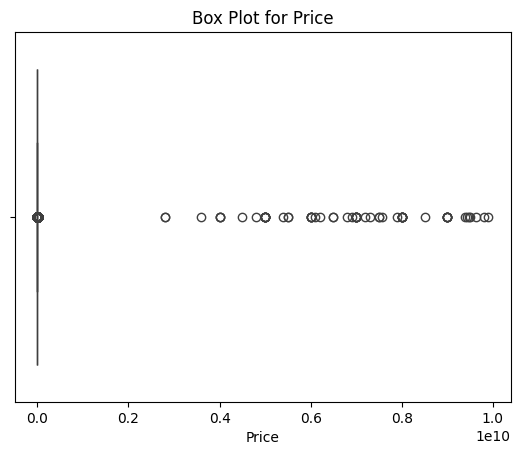

In [69]:
sns.boxplot(x=df['Price'])
plt.title('Box Plot for Price')
plt.show()

In [70]:
#detecting Outlier for Price	 column
iqr = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)
upper_threshold = df['Price'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Price'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(1758500.0, -397499.99999999994)

In [71]:
#removing outlier for Price column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.Price	 = df.Price.clip(lower_threshold, upper_threshold)

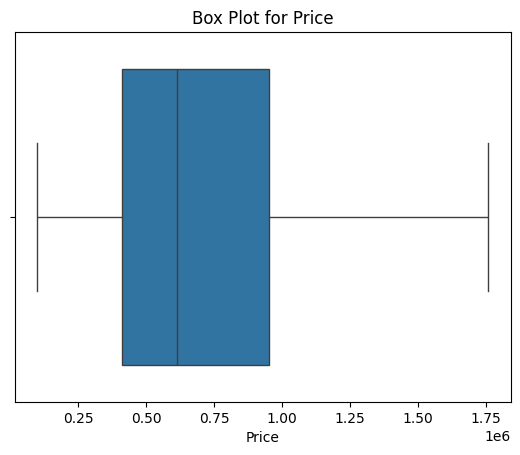

In [72]:
sns.boxplot(x=df['Price'])
plt.title('Box Plot for Price')
plt.show()

In [73]:
df

,Fuel_Type,Body_Type,Transmission,Number_of_Owners,Car_Model,Price,Registration_Year,Seats,Kms_Driven,Power Steering,Air Conditioner,Heater,Centeral Locking,Child Safety Locks,Anti Theft Device,mileage(kmpl),max_power(bhp)
0,Petrol,Hatchback,Manual,3,Maruti Celerio,400000.0,2015,5,120000,1,1,1,1,1,1,23.10,67.04
1,Petrol,SUV,Manual,2,Ford Ecosport,811000.0,2018,5,32706,1,1,1,1,1,1,17.00,121.31
2,Petrol,Hatchback,Manual,1,Tata Tiago,585000.0,2018,5,11949,1,1,1,1,1,1,23.84,84.00
3,Petrol,Sedan,Manual,1,Hyundai Xcent,462000.0,2014,5,17794,1,1,1,1,1,1,19.10,81.86
4,Diesel,SUV,Manual,1,Maruti SX4 S Cross,790000.0,2015,5,60000,1,1,1,1,1,1,23.65,88.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8348,Petrol,SUV,Manual,1,Hyundai Creta,1000000.0,2019,5,20000,1,1,1,1,1,1,15.80,121.30
8349,Petrol,Sedan,Manual,1,Maruti Swift Dzire,550000.0,2019,5,40000,1,1,1,1,1,1,21.21,81.80
8356,Petrol,SUV,Manual,1,Tata Nexon,674000.0,2022,5,20000,1,1,1,1,0,0,17.33,118.35
8359,Petrol,Sedan,Manual,1,Maruti Swift Dzire,250000.0,2010,5,60000,1,1,1,1,1,0,17.50,85.80


# **EDA**

In [74]:
# calculate correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
# plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

ValueError: could not convert string to float: 'Petrol'

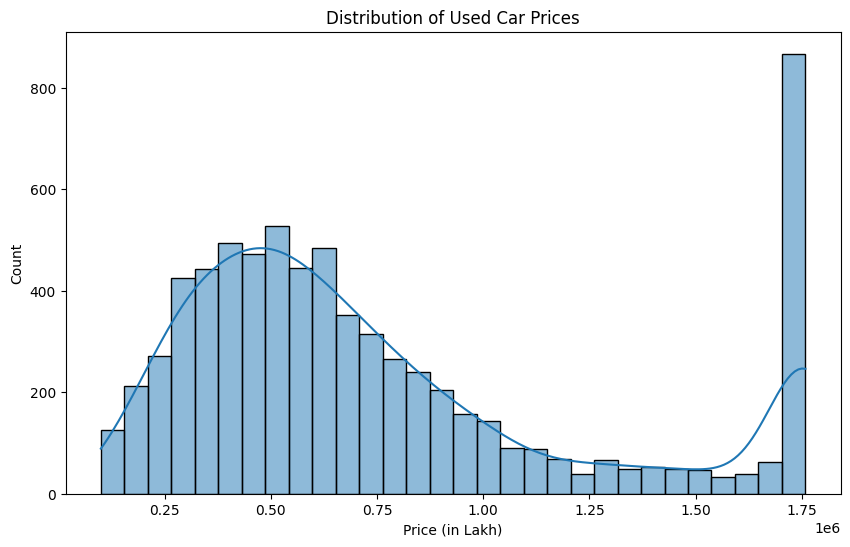

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price (in Lakh)')
plt.show()

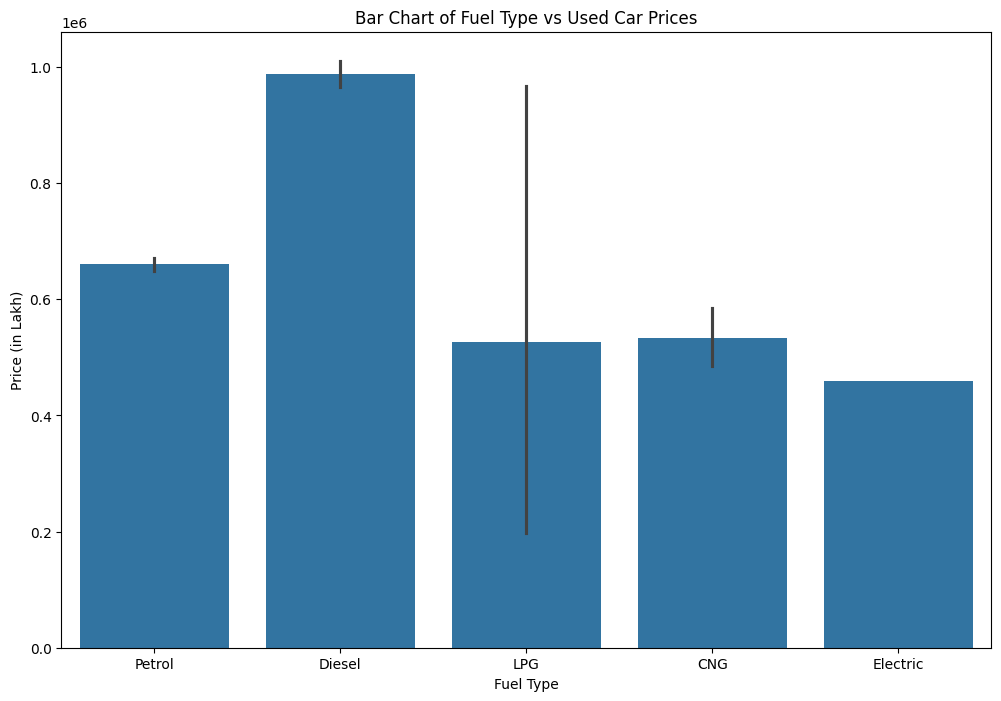

In [77]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Fuel_Type', y='Price', data=df)
plt.title('Bar Chart of Fuel Type vs Used Car Prices')
plt.xlabel('Fuel Type')
plt.ylabel('Price (in Lakh)')
plt.show()

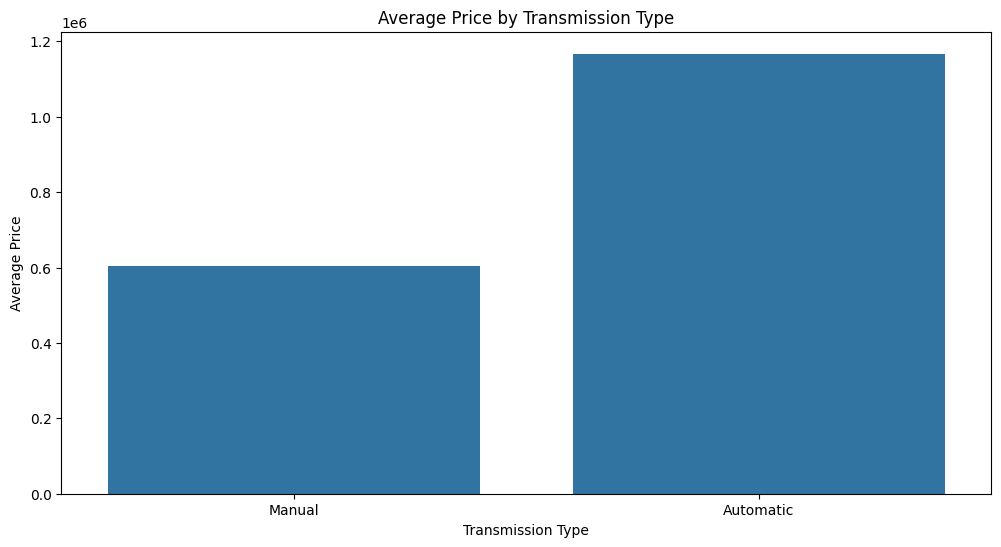

In [78]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Transmission', y='Price', data=df, ci=None)
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Price')
plt.show()

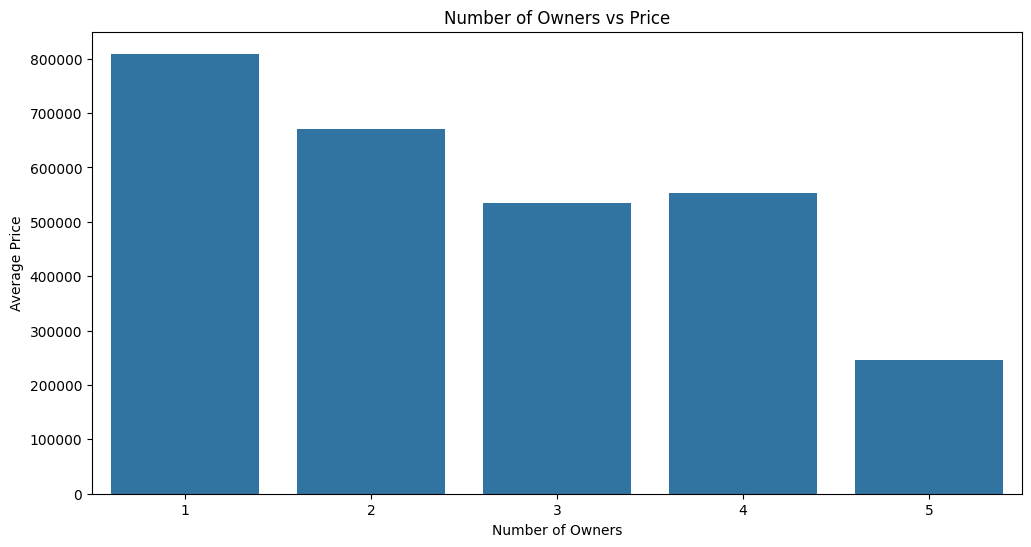

In [79]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Number_of_Owners', y='Price', data=df, ci=None)
plt.title('Number of Owners vs Price')
plt.xlabel('Number of Owners')
plt.ylabel('Average Price')
plt.show()

In [80]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'LPG': 2, 'CNG': 3, 'Electric': 4})
df['Body_Type'] = df['Body_Type'].map({'Hatchback': 0,'SUV': 1,'Sedan': 2,'MUV': 3,'Minivans': 4,'Convertibles': 5,'Hybrids': 6,'Coupe': 7,'Wagon': 8,'Pickup Trucks': 9})
df['Transmission'] = df['Transmission'].map({'Manual': 0,'Automatic': 1})
df['Car_Model'] = df['Car_Model'].map({
    'Maruti Celerio': 0,
    'Ford Ecosport': 1,
    'Tata Tiago': 2,
    'Hyundai Xcent': 3,
    'Maruti SX4 S Cross': 4,
    'Jeep Compass': 5,
    'Datsun GO': 6,
    'Maruti Ciaz': 7,
    'Hyundai Grand i10': 8,
    'Honda Jazz': 9,
    'Mahindra XUV500': 10,
    'Hyundai i20': 11,
    'Tata Nexon': 12,
    'Honda City': 13,
    'Maruti Swift': 14,
    'Renault Duster': 15,
    'Hyundai Santro': 16,
    'Mercedes-Benz E-Class': 17,
    'Audi A4': 18,
    'Maruti Wagon R': 19,
    'Maruti Ertiga': 20,
    'Mercedes-Benz C-Class': 21,
    'BMW 5 Series': 22,
    'Toyota Fortuner': 23,
    'Maruti Baleno': 24,
    'Hyundai Elantra': 25,
    'Audi A6': 26,
    'Maruti Alto 800': 27,
    'Mahindra Scorpio': 28,
    'Mini 3 DOOR': 29,
    'Kia Seltos': 30,
    'Mercedes-Benz GL-Class': 31,
    'Tata New Safari': 32,
    'Audi Q7': 33,
    'Renault KWID': 34,
    'Hyundai Getz': 35,
    'Skoda Rapid': 36,
    'Hyundai Creta': 37,
    'Tata Harrier': 38,
    'BMW 3 Series GT': 39,
    'Skoda Octavia': 40,
    'Maruti Ritz': 41,
    'Volkswagen Polo': 42,
    'Mahindra KUV 100': 43,
    'BMW X3': 44,
    'Hyundai i10': 45,
    'Volvo S60': 46,
    'Mahindra XUV300': 47,
    'MG Hector Plus': 48,
    'Honda Brio': 49,
    'Maruti Alto K10': 50,
    'Renault Kiger': 51,
    'Hyundai EON': 52,
    'Volkswagen Vento': 53,
    'Toyota Yaris': 54,
    'Hyundai Alcazar': 55,
    'Volkswagen T-Roc': 56,
    'BMW 3 Series': 57,
    'Audi Q5': 58,
    'Ford Endeavour': 59,
    'Maruti Ignis': 60,
    'BMW X5': 61,
    'Hyundai Tucson': 62,
    'MG Hector': 63,
    'Hyundai Verna': 64,
    'Mercedes-Benz GLC': 65,
    'Nissan Terrano': 66,
    'Honda CR-V': 67,
    'Mercedes-Benz A-Class Limousine': 68,
    'Toyota Innova': 69,
    'BMW 6 Series': 70,
    'Maruti Baleno RS': 71,
    'Renault Captur': 72,
    'Fiat Linea': 73,
    'Hyundai i20 Active': 74,
    'Hyundai Santro Xing': 75,
    'Maruti Vitara Brezza': 76,
    'Honda WR-V': 77,
    'Mahindra Ssangyong Rexton': 78,
    'Mitsubishi Cedia': 79,
    'Jaguar XF': 80,
    'Hyundai Venue': 81,
    'Audi A3': 82,
    'Skoda Kushaq': 83,
    'Maruti Swift Dzire': 84,
    'MG Astor': 85,
    'Hyundai Accent': 86,
    'Mercedes-Benz B Class': 87,
    'Kia Carnival': 88,
    'Skoda Laura': 89,
    'Skoda Superb': 90,
    'BMW X4': 91,
    'Land Rover Discovery Sport': 92,
    'Maruti Alto': 93,
    'Volvo XC40': 94,
    'Mahindra Verito': 95,
    'Maruti S-Presso': 96,
    'Volkswagen Jetta': 97,
    'Datsun RediGO': 98,
    'Ford Aspire': 99,
    'Ford Freestyle': 100,
    'Audi Q3': 101,
    'Ford Figo': 102,
    'Tata Tigor': 103,
    'Mercedes-Benz A Class': 104,
    'Toyota Glanza': 105,
    'Nissan Magnite': 106,
    'Renault Lodgy': 107,
    'Maruti Celerio X': 108,
    'Mercedes-Benz M-Class': 109,
    'Mercedes-Benz GLE': 110,
    'Mercedes-Benz CLA': 111,
    'Kia Sonet': 112,
    'Volkswagen Tiguan': 113,
    'Tata Altroz': 114,
    'Tata Indica V2': 115,
    'Toyota Innova Crysta': 116,
    'Volkswagen Ameo': 117,
    'Volkswagen Taigun': 118,
    'BMW X1': 119,
    'Chevrolet Cruze': 120,
    'Toyota Camry': 121,
    'Mahindra TUV 300': 122,
    'Chevrolet Beat': 123,
    'Toyota Corolla Altis': 124,
    'Maruti Eeco': 125,
    'Citroen C5 Aircross': 126,
    'Mahindra XUV700': 127,
    'Hyundai Grand i10 Nios': 128,
    'Maruti Zen': 129,
    'Mahindra Quanto': 130,
    'Land Rover Freelander 2': 131,
    'OpelCorsa': 132,
    'Mahindra Thar': 133,
    'Mahindra Xylo': 134,
    'Tata Zest': 135,
    'Honda New Accord': 136,
    'Skoda Yeti': 137,
    'Jaguar XE': 138,
    'Chevrolet Spark': 139,
    'Hyundai i20 N Line': 140,
    'Chevrolet Tavera': 141,
    'Mahindra Renault Logan': 142,
    'Mahindra e2o Plus': 143,
    'Citroen C3': 144,
    'Tata Nano': 145,
    'Mahindra Bolero Power Plus': 146,
    'Tata Hexa': 147,
    'Nissan Micra Active': 148,
    'Ford Fiesta': 149,
    'Fiat Punto': 150,
    'Kia Carens': 151,
    'Volkswagen Tiguan Allspace': 152,
    'Renault Triber': 153,
    'Skoda Slavia': 154,
    'Honda Amaze': 155,
    'Mahindra Marazzo': 156,
    'Tata Indigo': 157,
    'Nissan Sunny': 158,
    'Ford Ikon': 159,
    'Toyota Urban cruiser': 160,
    'Maruti SX4': 161,
    'Fiat Palio': 162,
    'Toyota Etios': 163,
    'Jeep Meridian': 164,
    'BMW 1 Series': 165,
    'Skoda Fabia': 166,
    'Volvo XC 90': 167,
    'Audi A3 cabriolet': 168,
    'MG Gloster': 169,
    'Mercedes-Benz S-Class': 170,
    'Nissan Micra': 171,
    'Fiat Punto EVO': 172,
    'Mini Cooper Countryman': 173,
    'Renault Fluence': 174,
    'Mahindra Bolero': 175,
    'Maruti A-Star': 176,
    'Chevrolet Sail': 177,
    'BMW 7 Series': 178,
    'Maruti XL6': 179,
    'Hyundai Sonata': 180,
    'Honda Civic': 181,
    'Isuzu MU 7': 182,
    'Mini Cooper': 183,
    'Maruti 800': 184,
    'Hyundai Aura': 185,
    'BMW 3 Series Gran Limousine': 186,
    'Volvo S90': 187,
    'Jaguar F-Pace': 188,
    'Tata Punch': 189,
    'Honda BR-V': 190,
    'Mahindra Scorpio N': 191,
    'Skoda Kodiaq': 192,
    'Tata Tiago NRG': 193,
    'Datsun GO Plus': 194,
    'Maruti Wagon R Stingray': 195,
    'Mini 5 DOOR': 196,
    'Fiat Grande Punto': 197,
    'Mahindra KUV 100 NXT': 198,
    'Mercedes-Benz GLA Class': 199,
    'Chevrolet Aveo': 200,
    'Land Rover Range Rover Velar': 201,
    'Tata Indica': 202,
    'Toyota Hyryder': 203,
    'Maruti Zen Estilo': 204,
    'Land Rover Range Rover Evoque': 205,
    'Mitsubishi Lancer': 206,
    'Isuzu MU-X': 207,
    'Fiat Punto Pure': 208,
    'Honda Mobilio': 209,
    'Chevrolet Optra': 210,
    'Hyundai Santa Fe': 211,
    'Chevrolet Enjoy': 212,
    'Volvo S 80': 213,
    'Mitsubishi Pajero': 214,
    'Audi A8': 215,
    'Volvo XC60': 216,
    'Mercedes-Benz AMG GLA 35': 217,
    'Mercedes-Benz AMG A 35': 218,
    'Volkswagen Virtus': 219,
    'Land Rover Discovery': 220,
    'Lexus ES': 221,
    'Audi Q2': 222,
    'Nissan Kicks': 223,
    'Mahindra TUV 300 Plus': 224,
    'Tata Safari Storme': 225,
    'Maruti Brezza': 226,
    'Jeep Wrangler': 227,
    'Toyota Etios Cross': 228,
    'Toyota Etios Liva': 229,
    'Mercedes-Benz GLC Coupe': 230,
    'Lexus RX': 231,
    'Land Rover Range Rover Sport': 232,
    'Mercedes-Benz CLS-Class': 233,
    'Maruti Jimny': 234,
    'Mini Cooper Clubman': 235,
    'Porsche Cayenne': 236,
    'Maruti Swift Dzire Tour': 237,
    'Mercedes-Benz GLA': 238,
    'Mercedes-Benz GLS': 239,
    'Porsche Macan': 240,
    'Mini Cooper Convertible': 241,
    'Toyota Fortuner Legender': 242,
    'Mahindra Scorpio Classic': 243,
    'Mercedes-Benz SLC': 244,
    'Maruti Grand Vitara': 245,
    'Tata Manza': 246,
    'Mitsubishi Outlander': 247,
    'Maruti FRONX': 248,
    'Jaguar XJ': 249,
    'Mahindra Alturas G4': 250,
    'Volkswagen Passat': 251,
    'Maruti Gypsy': 252,
    'Ford Fiesta Classic': 253,
    'Fiat Avventura': 254,
    'Honda City Hybrid': 255,
    'Tata Aria': 256,
    'Tata Bolt': 257,
    'Fiat Abarth Avventura': 258,
    'Mahindra Bolero Neo': 259,
    'Chevrolet Captiva': 260,
    'Toyota Corolla': 261,
    'Volvo S60 Cross Country': 262,
    'Renault Scala': 263,
    'Chevrolet Aveo U-VA': 264,
    'Isuzu D-Max': 265,
    'Maruti Omni': 266,
    'Maruti Esteem': 267,
    'Renault Pulse': 268,
    'Volkswagen CrossPolo': 269,
    'Jeep Compass Trailhawk': 270,
    'Tata Sumo Victa': 271,
    'Volvo V40': 272,
    'Porsche Panamera': 273,
    'Audi S5 Sportback': 274,
    'Jaguar F-TYPE': 275,

})




In [81]:
df

,Fuel_Type,Body_Type,Transmission,Number_of_Owners,Car_Model,Price,Registration_Year,Seats,Kms_Driven,Power Steering,Air Conditioner,Heater,Centeral Locking,Child Safety Locks,Anti Theft Device,mileage(kmpl),max_power(bhp)
0,0,0,0,3,0,400000.0,2015,5,120000,1,1,1,1,1,1,23.10,67.04
1,0,1,0,2,1,811000.0,2018,5,32706,1,1,1,1,1,1,17.00,121.31
2,0,0,0,1,2,585000.0,2018,5,11949,1,1,1,1,1,1,23.84,84.00
3,0,2,0,1,3,462000.0,2014,5,17794,1,1,1,1,1,1,19.10,81.86
4,1,1,0,1,4,790000.0,2015,5,60000,1,1,1,1,1,1,23.65,88.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8348,0,1,0,1,37,1000000.0,2019,5,20000,1,1,1,1,1,1,15.80,121.30
8349,0,2,0,1,84,550000.0,2019,5,40000,1,1,1,1,1,1,21.21,81.80
8356,0,1,0,1,12,674000.0,2022,5,20000,1,1,1,1,0,0,17.33,118.35
8359,0,2,0,1,84,250000.0,2010,5,60000,1,1,1,1,1,0,17.50,85.80


**Feature and Target Selection**

In [82]:
# X --> Feature y-- >target
x = df.drop(columns=['Price'], axis=1)
y = df['Price']

**split**

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Model**

**LINEAR REGRESSION**

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, y_train, X_test, y_test are already defined

reg = LinearRegression().fit(x_train, y_train)

y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("MSE - Train: {:.4f} Test: {:.4f}".format(mse_train, mse_test))
print("R2 - Train: {:.4f} Test: {:.4f}".format(r2_train, r2_test))
print("MAE - Train: {:.4f} Test: {:.4f}".format(mae_train, mae_test))

MSE - Train: 76637855045.8607 Test: 69418743436.6654
R2 - Train: 0.6683 Test: 0.7093
MAE - Train: 183764.5377 Test: 178932.3846


**DECISION TREE**

In [85]:
from sklearn.tree import DecisionTreeRegressor


# Create a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
dt.fit(x_train, y_train)

# Predict the values for the training and testing sets
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# Compute the MSE, MAE, and R2 for the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Compute the MSE, MAE, and R2 for the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("MSE - Train: {:.4f} Test: {:.4f}".format(mse_train, mse_test))
print("R2 - Train: {:.4f} Test: {:.4f}".format(r2_train, r2_test))
print("MAE - Train: {:.4f} Test: {:.4f}".format(mae_train, mae_test))

MSE - Train: 305373392.9406 Test: 44232623349.1117
R2 - Train: 0.9987 Test: 0.8147
MAE - Train: 1357.0594 Test: 108372.0781


**RANDOM FOREST**

In [86]:
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(x_train, y_train)

# Predict the values for the training and testing sets
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Compute the MSE, MAE, and R2 for the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Compute the MSE, MAE, and R2 for the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the results
print("MSE - Train: {:.4f} Test: {:.4f}".format(mse_train, mse_test))
print("MAE - Train: {:.4f} Test: {:.4f}".format(mae_train, mae_test))
print("R2 - Train: {:.4f} Test: {:.4f}".format(r2_train, r2_test))

MSE - Train: 4540840527.9175 Test: 25944005387.3771
MAE - Train: 36550.5115 Test: 94851.0927
R2 - Train: 0.9803 Test: 0.8913


**XGBOOST**

In [87]:
import xgboost as xgb
# Create an XGBoost Regressor with 'reg:linear' objective
XGB = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, seed=42)

# Fit the model to the training data
XGB.fit(x_train, y_train)

# Predict the values for the training and testing sets
y_pred_train = XGB.predict(x_train)
y_pred_test = XGB.predict(x_test)

# Compute the MSE, MAE, and R2 for the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Compute the MSE, MAE, and R2 for the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the results
print("MSE - Train: {:.4f} Test: {:.4f}".format(mse_train, mse_test))
print("MAE - Train: {:.4f} Test: {:.4f}".format(mae_train, mae_test))
print("R2 - Train: {:.4f} Test: {:.4f}".format(r2_train, r2_test))

MSE - Train: 762524181.4602 Test: 28282280946.9582
MAE - Train: 14552.6903 Test: 101223.1853
R2 - Train: 0.9967 Test: 0.8815


**PREDICTED PRICE**

In [88]:
# Example X_new for a single data point
X_new = pd.DataFrame({
    'Fuel_Type': [1],
    'Body_Type': [7],
    'Transmission': [1],
    'Number_of_Owners': [1],
    'Car_Model': [157],
    'Registration_Year': [2015],
    'Seats': [5],
    'Kms_Driven': [120000],
    'Power Steering': [1],
    'Air Conditioner': [1],
    'Heater': [1],
    'Centeral Locking': [1],
    'Child Safety Locks': [1],
    'Anti Theft Device': [1],
    'mileage(kmpl)': [23.65],
    'max_power(bhp)': [88.50]



})


# Predict the rent for the new values
predicted_Price =rf.predict(X_new)

# Round the predicted rent to the nearest integer using numpy.round
Price = np.round(predicted_Price)

# Display the rounded predicted Price
print("Price:", Price)

Price: [681320.]


**save model**

In [89]:
pickle.dump(rf, open('Car_Price.pkl', 'wb'))